In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

### Binned Ratio (Modeled From Fig1_detect_nocifensive_behaviors Notebook)

In [3]:
### load predicted behaviors

behaviors = load_behaviors('../processed_dataset/behaviors_study5.pkl')

In [7]:
### some params
# bin time 1 minute, change the last  number to 2 for 2 minute bins
num_min = 1
time_bin_size = 60*60*num_min
# take random file to compute total number of bins
n_bins = len(behaviors['Morphine']['Combined']['Control']['file0'])/time_bin_size

# Select Study-- 'Morphine' or 'Morphine_Formalin'
selected_study = 'Morphine_Formalin'

# Select groups
selected_group_1 = 'Male'
selected_group_2 = 'Female'
selected_group_3 = 'Combined'

# Select Condition-- 'Control' or 'Experimental'
selected_condition_1 = 'Experimental'
selected_condition_2 = 'Experimental'
selected_condition_3 = 'Experimental'

selected_groups = [selected_group_1, selected_group_2, selected_group_3]
selected_conditions = [selected_condition_1, selected_condition_2, selected_condition_3]

# Adjust for selected_study
annotations = [f"{selected_study} {selected_group_1} {selected_condition_1} OPRM1-Re-Express", 
               f"{selected_study} {selected_group_2} {selected_condition_2} OPRM1-Re-Express", 
               f"{selected_study} {selected_group_3} {selected_condition_3} OPRM1-Re-Express"]

# annotations = ['Male Morphine OPRM1-Re-Express', "Female '{selected_study}' OPRM1-Re-Express", "Combined '{selected_study}' OPRM1-Re-Express"]

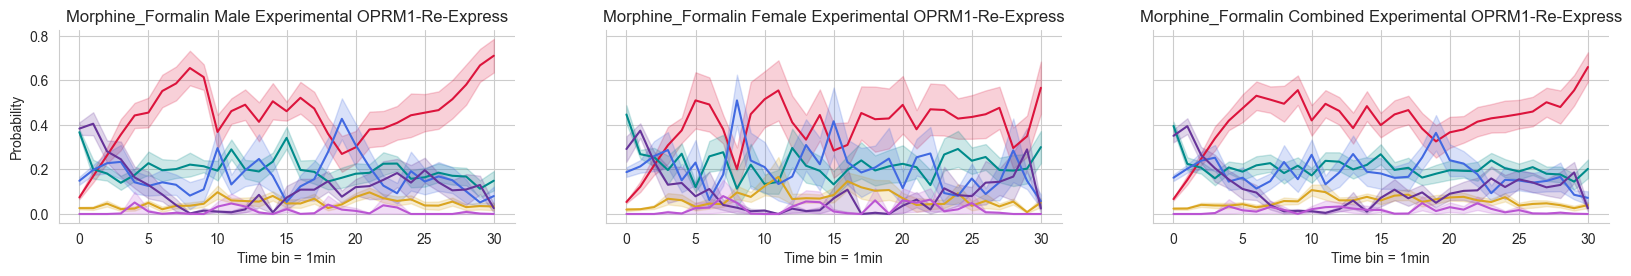

In [8]:
# bin behaviors per params above
rows = 1
cols = len(selected_groups)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(20, 2.5), sharey=True)
y_to_save = {key: [] for key in annotations}
for selected_group, selected_condition in zip(selected_groups, selected_conditions):
    # for each group/condition
    behavior_ratios_across_study = {key: np.NAN 
                                  for key in drugs_study5}
    for study in drugs_study5:
        behavior_ratios_files = {key: np.NAN 
                                 for key in range(len(behaviors[selected_study][selected_group][selected_condition]))}
        
        for f in range(len(behaviors[selected_study][selected_group][selected_condition])):
            binned_behavs = []
            for bin_n in range(int(n_bins)):
                # get counts paired with unique value
                behavior_ratios = {key: 0 for key in range(len(behavior_names))}
                values, counts = np.unique(behaviors[selected_study][selected_group][selected_condition][f'file{f}'][
                    int(time_bin_size*bin_n):int(time_bin_size*(bin_n+1))], 
                    return_counts=True)
                # normalize to sum = 1
                for i, value in enumerate(values):
                    behavior_ratios[value] = counts[i]/sum(counts)
                binned_behavs.append(behavior_ratios)
            # store relative to file number
            behavior_ratios_files[f] = binned_behavs
            
        # store relative to study
        behavior_ratios_across_study[selected_study] = behavior_ratios_files
        
        behavior_ratios_files = {key: np.nan for key in range(len           
                                                                (behaviors[selected_study][selected_group][selected_condition]))}
                                                                  
        for f in range(len(behaviors[selected_study][selected_group][selected_condition])):
            binned_behaviors = []
            for bin_n in range(int(n_bins)):
                behavior_ratios = {key: 0 for key in range(len(behavior_names))}
                values, counts = np.unique(behaviors[selected_study][selected_group][selected_condition][f'file{f}'][time_bin_size * bin_n:time_bin_size * (bin_n + 1)], return_counts=True)
                for i, value in enumerate(values):
                    behavior_ratios[value] = counts[i] / sum(counts)
                binned_behaviors.append(behavior_ratios)
            behavior_ratios_files[f] = binned_behaviors
        
    # plotting below, compute mean and sem across all files (regardless of sex)
    y_to_save[annotations[count]] = {key: [] for key in behavior_names}
    for b in range(len(behavior_names)):
        
        y_files = []
        for study in drugs_study5:
            for f in range(len(behavior_ratios_across_study[selected_study])):
                y_files.append(np.hstack([behavior_ratios_across_study[selected_study][f][bin][b] 
                                          for bin in range(len(behavior_ratios_across_study[selected_study][f]))])
                               )
        
        y = (np.mean(y_files, axis=0))
        y_to_save[annotations[count]][behavior_names[b]] = y.copy()
        x = np.arange(int(n_bins))
        y_sem = (np.std(y_files, axis=0)/np.sqrt(len(behavior_ratios_files)))
        # plot shadederrorbar
        ax[count].plot(x, y, color=behavior_colors[b])
        ax[count].fill_between(x, y-y_sem, y+y_sem, color=behavior_colors[b], alpha=0.2)
    ax[count].set_title(annotations[count])
    ax[count].spines[['top', 'right']].set_visible(False)
    ax[count].set_xlabel(f'Time bin = {num_min}min')
    if count == 0:
        ax[count].set_ylabel('Probability')
    count += 1

In [56]:
df = pd.DataFrame(y_to_save).T
df.to_csv('../csvs/oprm1-rexpress_morphine-formalin_exp_mean_ratio.csv')

In [57]:
fig.savefig(f'../figures/oprm1-rexpress_morphine-formalin_exp_mean_ratio.svg', 
            dpi=600, bbox_inches='tight')

## CSV mean-behavior-bins

In [22]:
# Check if behaviors is None or empty
if behaviors is None or not behaviors:
    print("Error: Failed to load behaviors or empty dataset.")
else:
    # Assuming behavior_names and behavior_colors are defined elsewhere
    behavior_names = ['still', 'walking', 'rearing', 'grooming', 'licking hindpaw L', 'licking hindpaw_R']
    behavior_colors = ['crimson', 'darkcyan', 'goldenrod', 'royalblue', 'rebeccapurple', 'mediumorchid']

    # Select group and condition
    selected_study = 'Morphine_Formalin'
    selected_group = 'Female'
    selected_condition = 'Experimental'

    # Define some params
    num_min = 1
    time_bin_size = 60 * 60 * num_min

    # Check if selected_group and selected_condition exist in behaviors
    #if selected_study in behaviors[selected_study] and selected_group in behaviors[selected_group] and selected_condition in behaviors[selected_condition]:
    if selected_study in behaviors and selected_group in behaviors[selected_study] and selected_condition in behaviors[selected_study][selected_group]:
        n_bins = len(behaviors[selected_study][selected_group][selected_condition]['file0']) // time_bin_size

        behavior_ratios_files = {key: np.nan for key in range(len(behaviors[selected_study][selected_group][selected_condition]))}

        for f in range(len(behaviors[selected_study][selected_group][selected_condition])):
            binned_behaviors = []
            for bin_n in range(int(n_bins)):
                behavior_ratios = {key: 0 for key in range(len(behavior_names))}
                values, counts = np.unique(behaviors[selected_study][selected_group][selected_condition][f'file{f}'][time_bin_size * bin_n:time_bin_size * (bin_n + 1)], return_counts=True)
                for i, value in enumerate(values):
                    behavior_ratios[value] = counts[i] / sum(counts)
                binned_behaviors.append(behavior_ratios)
            behavior_ratios_files[f] = binned_behaviors

        # Initialize a dictionary to hold the data
        data_to_save = {'Time_bin': np.arange(int(n_bins))}

        for b in range(len(behavior_names)):
            y_files = []
            for f in range(len(behavior_ratios_files)):
                y_files.append(np.hstack([behavior_ratios_files[f][bin][b] for bin in range(len(behavior_ratios_files[f]))]))
            y = np.mean(y_files, axis=0)
            x = np.arange(int(n_bins))
            y_sem = np.std(y_files, axis=0) / np.sqrt(len(behavior_ratios_files))

            # Add data to the dictionary
            data_to_save[behavior_names[b]] = y
            data_to_save[f'{behavior_names[b]}_SEM'] = y_sem

        # Convert dictionary to DataFrame
        df = pd.DataFrame(data_to_save)

        # Save DataFrame to CSV
        csv_filename = f'../csvs/{selected_study} {selected_group}_{selected_condition}_binned-data_oprm1-reexpress.csv'
        df.to_csv(csv_filename, index=False)

        print(f"Data saved to {csv_filename}.")
    else:
        print(f"Error: Selected group '{selected_group}' or condition '{selected_condition}' not found in the dataset.")


Data saved to ../csvs/Morphine_Formalin Female_Experimental_binned-data_oprm1-reexpress.csv.
